In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc,roc_auc_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import itertools


In [ ]:
#read dataset
data='//content//CSRF_dataset.csv'
df = pd.read_csv(data)

In [ ]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 5894
Number of Columns: 52


In [ ]:
col_names = df.columns

col_names

Index(['reqId', 'flag', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath',
       'createInParams', 'addInPath', 'addInParams', 'setInPath',
       'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath',
       'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath',
       'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath',
       'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath',
       'changeInParams', 'actionInPath', 'actionInParams', 'payInPath',
       'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath',
       'logoutInParams', 'postInPath', 'postInParams', 'commentInPath',
       'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath',
       'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath',
       'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS'],
      dtype='object')

In [ ]:
df['flag'].value_counts()

,count
flag,
0,4962
1,932


- **Selecting Feature**

In [ ]:
X = df.drop(['flag'], axis=1)
y = df['flag']

-  **Splitting the data into train ,test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_counts = y_train.value_counts()
print("Train set counts:")
print(train_counts)

Train set counts:
flag
0    3967
1     748
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
print("Train set counts after SMOTE:")
print(y_train_res.value_counts())

Train set counts after SMOTE:
flag
0    3967
1    3967
Name: count, dtype: int64


In [ ]:
test_counts = y_test.value_counts()
print("Test set counts:")
print(test_counts)

Test set counts:
flag
0    995
1    184
Name: count, dtype: int64


In [ ]:
print("X_train:", X_train_res.shape)
print("y_train:", y_train_res.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (7934, 51)
y_train: (7934,)
X_test: (1179, 51)
y_test: (1179,)


In [ ]:
y_train_pred, y_test_pred = None, None
def evaluate_model (model) :
    global y_train_pred, y_test_pred
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)

In [ ]:
def show_confusion_matrix ():
    cm_train = confusion_matrix(y_train_res, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Training')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_train)))
    plt.xticks(tick_marks, np.unique(y_train))
    plt.yticks(tick_marks, np.unique(y_train))
    fmt = 'd'
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        plt.text(j, i, format(cm_train[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.subplot(1, 2, 2)
    plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Testing')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    fmt = 'd'
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        plt.text(j, i, format(cm_test[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

def get_classification_report():
    # Calculate predicted probabilities for training and testing sets
    y_train_pred_proba = log_reg_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
    y_test_pred_proba = log_reg_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    # Convert predicted probabilities to binary predictions for classification report
    y_train_pred = (y_train_pred_proba >= 0.5).astype(int)
    y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

    # Calculate ROC AUC score for training and testing
    roc_auc_train = roc_auc_score(y_train_res, y_train_pred_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

    cr_train = classification_report(y_train_res, y_train_pred, output_dict=True)
    cr_test = classification_report(y_test, y_test_pred, output_dict=True)

    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
        'Train': [cr_train['accuracy'], cr_train['1']['precision'], cr_train['1']['recall'], cr_train['1']['f1-score'], roc_auc_train],
        'Test': [cr_test['accuracy'], cr_test['1']['precision'], cr_test['1']['recall'], cr_test['1']['f1-score'], roc_auc_test]
    }
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [ ]:
def show_roc_curve(model):
    # Plot ROC curve and calculate AUC
    y_train_proba = model.predict_proba(X_train_res)[:,1]
    y_test_proba = model.predict_proba(X_test)[:,1]

    fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
roc_auc_scorer = make_scorer(roc_auc_score, average='weighted', multi_class='ovr')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)

X_test = scaler.transform(X_test)
# Display the result of the transformation
print("X_train_res:\n",X_train_res)
print("\n")
print("X_test:\n",X_test)
print("\n")

X_train_res:
 [[-0.99799345 -0.18167121 -0.38048801 ... -1.13567367  1.44594863
  -0.12906636]
 [ 1.01224797  0.30980586  1.68364318 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.42328462  0.18693659 -0.38048801 ... -1.13567367  1.44594863
  -0.12906636]
 ...
 [ 1.61618804 -0.18167121 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.35635232  0.43267513  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.45396192 -0.42740974 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]]


X_test:
 [[ 0.33641765  0.43267513  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.66643066 -0.42740974 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.30573993  0.43267513 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]
 ...
 [-1.03083986 -0.18167121  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.9623582  -0.05880194  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [ 1.74075648 -0.05880194  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]]



In [ ]:
cols = X.columns
cols

Index(['reqId', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath',
       'createInParams', 'addInPath', 'addInParams', 'setInPath',
       'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath',
       'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath',
       'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath',
       'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath',
       'changeInParams', 'actionInPath', 'actionInParams', 'payInPath',
       'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath',
       'logoutInParams', 'postInPath', 'postInParams', 'commentInPath',
       'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath',
       'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath',
       'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS'],
      dtype='object')

In [ ]:
X_train_res = pd.DataFrame(X_train_res, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train_res.head()

,reqId,numOfParams,numOfIds,reqLen,createInPath,createInParams,addInPath,addInParams,setInPath,setInParams,...,subscribeInParams,signInPath,signInParams,viewInPath,viewInParams,isPUT,isDELETE,isPOST,isGET,isOPTIONS
0,-0.997993,-0.181671,-0.380488,-0.067130,-0.078831,-0.100925,-0.087293,-0.094347,-0.185162,-0.164484,...,-0.042044,-0.105905,-0.079636,-0.151057,-0.184067,-0.047685,-0.043522,-1.135674,1.445949,-0.129066
1,1.012248,0.309806,1.683643,0.002975,-0.078831,-0.100925,-0.087293,-0.094347,-0.185162,-0.164484,...,-0.042044,-0.105905,-0.079636,-0.151057,-0.184067,-0.047685,-0.043522,0.880535,-0.691588,-0.129066
2,-0.423285,0.186937,-0.380488,-0.169102,-0.078831,-0.100925,-0.087293,-0.094347,-0.185162,6.079615,...,-0.042044,-0.105905,-0.079636,-0.151057,-0.184067,-0.047685,-0.043522,-1.135674,1.445949,-0.129066
3,-0.148118,-0.427410,-0.380488,-0.193229,-0.078831,-0.100925,-0.087293,-0.094347,-0.185162,-0.164484,...,-0.042044,-0.105905,-0.079636,-0.151057,-0.184067,-0.047685,-0.043522,0.880535,-0.691588,-0.129066
4,1.249920,-0.427410,-0.380488,-0.181393,-0.078831,-0.100925,-0.087293,-0.094347,-0.185162,-0.164484,...,-0.042044,-0.105905,-0.079636,-0.151057,-0.184067,-0.047685,-0.043522,-1.135674,1.445949,-0.129066


In [ ]:
round(X_train_res.describe(),3)

,reqId,numOfParams,numOfIds,reqLen,createInPath,createInParams,addInPath,addInParams,setInPath,setInParams,...,subscribeInParams,signInPath,signInParams,viewInPath,viewInParams,isPUT,isDELETE,isPOST,isGET,isOPTIONS
count,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,...,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000
mean,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,...,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.049,-0.550,-0.380,-0.202,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
25%,-0.767,-0.427,-0.380,-0.196,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
50%,-0.340,-0.305,-0.380,-0.166,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,0.881,-0.692,-0.129
75%,0.421,0.064,-0.380,-0.063,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,0.881,1.446,-0.129
max,3.408,18.863,13.036,59.314,12.685,9.908,11.456,10.599,5.401,6.080,...,23.785,9.442,12.557,6.620,5.433,20.971,22.977,0.881,1.446,7.748


In [ ]:
round(X_test.describe(),3)

,reqId,numOfParams,numOfIds,reqLen,createInPath,createInParams,addInPath,addInParams,setInPath,setInParams,...,subscribeInParams,signInPath,signInParams,viewInPath,viewInParams,isPUT,isDELETE,isPOST,isGET,isOPTIONS
count,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,...,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000
mean,-0.099,-0.086,0.013,0.041,-0.003,0.001,0.020,0.033,0.142,0.122,...,-0.022,0.016,-0.026,0.102,0.107,0.059,-0.004,-0.216,0.413,0.031
std,0.914,1.005,1.185,1.206,0.981,1.005,1.110,1.159,1.312,1.306,...,0.694,1.071,0.822,1.284,1.245,1.496,0.948,1.005,1.069,1.113
min,-1.049,-0.550,-0.380,-0.202,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
25%,-0.820,-0.550,-0.380,-0.202,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
50%,-0.372,-0.427,-0.380,-0.177,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,1.446,-0.129
75%,0.309,-0.059,-0.380,-0.042,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,0.881,1.446,-0.129
max,3.408,17.020,23.357,32.042,12.685,9.908,11.456,10.599,5.401,6.080,...,23.785,9.442,12.557,6.620,5.433,20.971,22.977,0.881,1.446,7.748


In [ ]:
print("Train set counts after SMOTE:")
print(y_train_res.value_counts())

Train set counts after SMOTE:
flag
0    3967
1    3967
Name: count, dtype: int64


---
# Logistic Regressiong

In [ ]:
# Define parameters for grid search
parameters = {
    'penalty': ['l1'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 2000],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression with possible parameters for tuning
log_reg_grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring=roc_auc_scorer, n_jobs=-1)
log_reg_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {log_reg_grid_search.best_params_}')
# Calculate ROC AUC on training set
y_pred_train = log_reg_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on testing set
y_pred_test = log_reg_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)

Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
ROC AUC score on training set:  0.9208714521472172
ROC AUC score on testing set:  0.8676807952807516


In [ ]:
lr_model = log_reg_grid_search.best_estimator_
evaluate_model(lr_model)

In [ ]:
get_classification_report()

,Metric,Train,Test
0,Accuracy,0.862995,0.767600
1,Precision,0.818443,0.382812
2,Recall,0.932947,0.798913
3,F1-score,0.871952,0.517606
4,ROC AUC,0.920871,0.867681


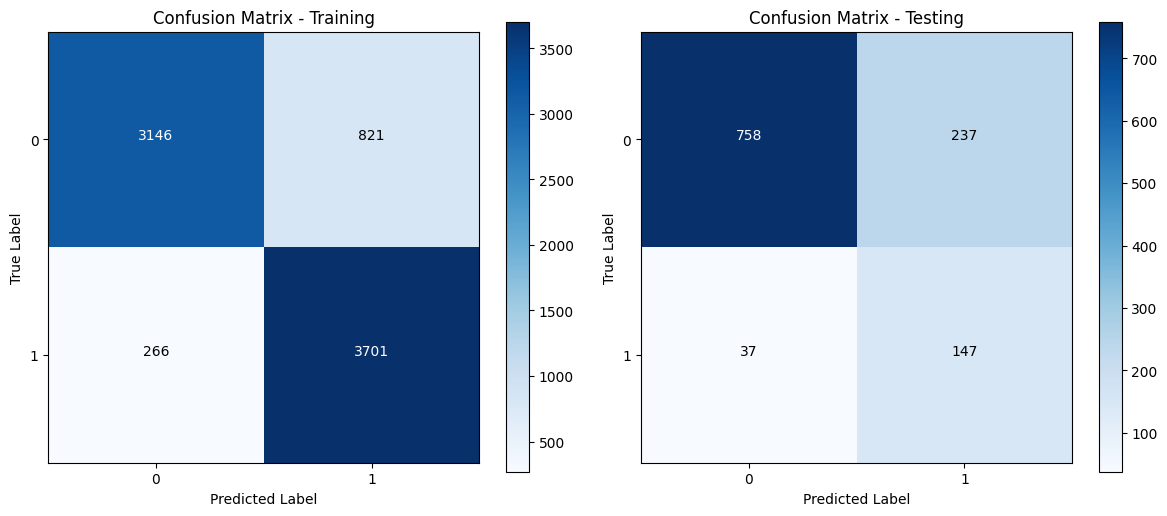

In [ ]:
show_confusion_matrix()

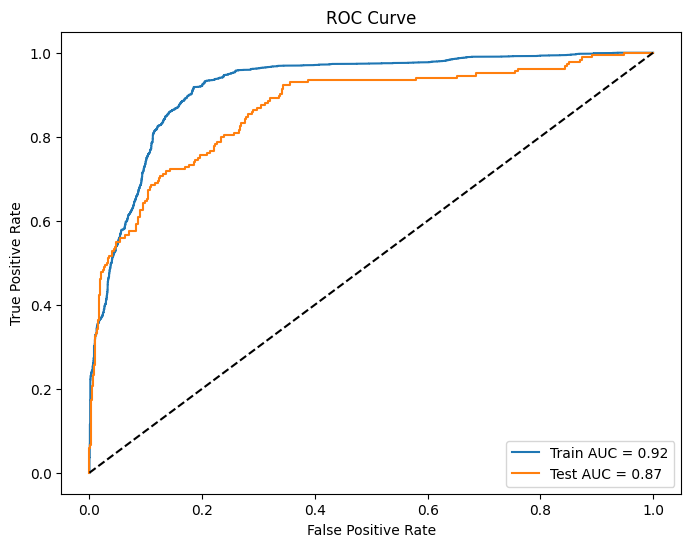

In [ ]:
show_roc_curve(lr_model)

In [ ]:
# Define parameters for grid search
parameters = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 2000],
    'solver': ['lbfgs', 'liblinear', 'saga','newton-cg'],
}

# Initialize the Logistic Regression with possible parameters for tuning
log_reg_grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring=roc_auc_scorer, n_jobs=-1)
log_reg_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {log_reg_grid_search.best_params_}')

# Calculate ROC AUC on training set
y_pred_train = log_reg_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on testing set
y_pred_test = log_reg_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)

Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
ROC AUC score on training set:  0.920877679474266
ROC AUC score on testing set:  0.8669161022503825


In [ ]:
# Define parameters for grid search
parameters = {
    'penalty': ['l2'],
    'C': [0.001,0.01,1,3],
    'max_iter': [1000,1300,1800,2000],
    'solver': ['lbfgs', 'sag', 'liblinear'],
}

# Initialize the Logistic Regression with possible parameters for tuning
log_reg_grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring=roc_auc_scorer, n_jobs=-1)
log_reg_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {log_reg_grid_search.best_params_}')

# Calculate ROC AUC on training set
y_pred_train = log_reg_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on testing set
y_pred_test = log_reg_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)

Best parameters: {'C': 3, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
ROC AUC score on training set:  0.9208863214791503
ROC AUC score on testing set:  0.8672820624863449


In [ ]:
# Define parameters for grid search
parameters = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 5,10],
    'max_iter': [200,300,400,600,800],
    'solver': ['lbfgs', 'liblinear', 'saga','newton-cg'],
}

# Initialize the Logistic Regression with possible parameters for tuning
log_reg_grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring=roc_auc_scorer, n_jobs=-1)
log_reg_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {log_reg_grid_search.best_params_}')

# Calculate ROC AUC on training set
y_pred_train = log_reg_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on testing set
y_pred_test = log_reg_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)

Best parameters: {'C': 5, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
ROC AUC score on training set:  0.9208821911091688
ROC AUC score on testing set:  0.8670089578326415


In [ ]:
lr_model = log_reg_grid_search.best_estimator_
evaluate_model(lr_model)

In [ ]:
get_classification_report()

,Metric,Train,Test
0,Accuracy,0.862869,0.766751
1,Precision,0.818262,0.381201
2,Recall,0.932947,0.793478
3,F1-score,0.871849,0.514991
4,ROC AUC,0.920882,0.867009


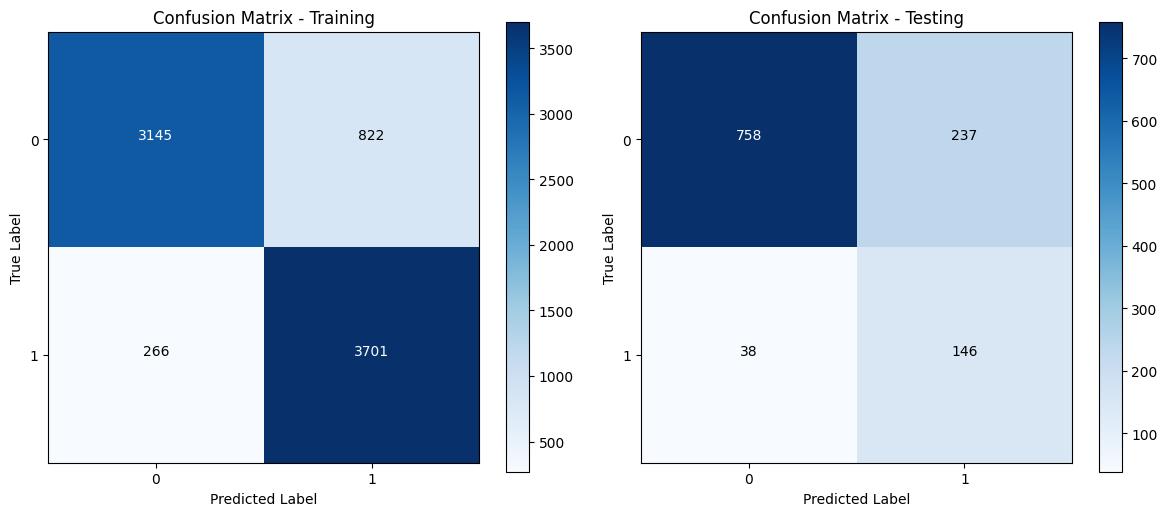

In [ ]:
show_confusion_matrix()

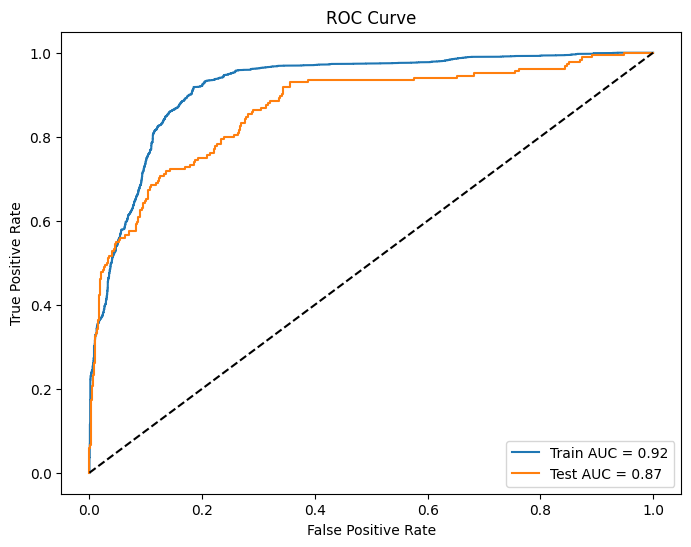

In [ ]:
show_roc_curve(lr_model)

In [ ]:
import pickle
path = "/content/drive/MyDrive/Colab Notebooks/models/lr_model.pkl"

# Save the model to a file
with open(path, 'wb') as file:
    pickle.dump(lr_model, file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pickle

record = "3,0,0,0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0"
input_data = pd.DataFrame([list(map(float, record.split(',')))])
input_data.columns = ['reqId', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath',
       'createInParams', 'addInPath', 'addInParams', 'setInPath',
       'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath',
       'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath',
       'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath',
       'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath',
       'changeInParams', 'actionInPath', 'actionInParams', 'payInPath',
       'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath',
       'logoutInParams', 'postInPath', 'postInParams', 'commentInPath',
       'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath',
       'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath',
       'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS']
# Load the model from the file
with open(path, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for predictions
predictions = loaded_model.predict(input_data)
print("Predictions: ", predictions)


Predictions:  [0 1 1 ... 1 1 1]
